In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Customers.csv',sep=',')
products = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Products.csv',sep=',')
transactions = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Transactions.csv',sep=',')

# Remove BOM characters from column names
customers.columns = customers.columns.str.replace('ï»¿', '')
products.columns = products.columns.str.replace('ï»¿', '')
transactions.columns = transactions.columns.str.replace('ï»¿', '')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets into one DataFrame
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')


# Merge datasets
transactions = pd.merge(transactions, customers, on='CustomerID')

In [ ]:
# Aggregate transaction data to compute customer-specific metrics
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total spending
    'Quantity': 'sum',         # Total quantity purchased
    'Price': 'mean',           # Average price of products purchased
}).reset_index()

# Add customer profile data
customer_profiles = customers[['CustomerID', 'Region']]
customer_features = pd.merge(customer_features, customer_profiles, on='CustomerID')

# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Display the final dataset
print(customer_features.head())


  CustomerID  TotalValue  Quantity       Price  Region_Europe  \
0      C0001     3354.52        12  278.334000          False   
1      C0002     1862.74        10  208.920000          False   
2      C0003     2725.38        14  195.707500          False   
3      C0004     5354.88        23  240.636250          False   
4      C0005     2034.24         7  291.603333          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


  CustomerID  TotalValue  Quantity       Price  Region_Europe  \
0      C0001     3354.52        12  278.334000          False   
1      C0002     1862.74        10  208.920000          False   
2      C0003     2725.38        14  195.707500          False   
3      C0004     5354.88        23  240.636250          False   
4      C0005     2034.24         7  291.603333          False   

   Region_North America  Region_South America  Cluster  
0                 False                  True        1  
1                 False                 False        2  
2                 False                  True        1  
3                 False                  True        0  
4                 False                 False        2  
Davies-Bouldin Index: 1.0686940534679177


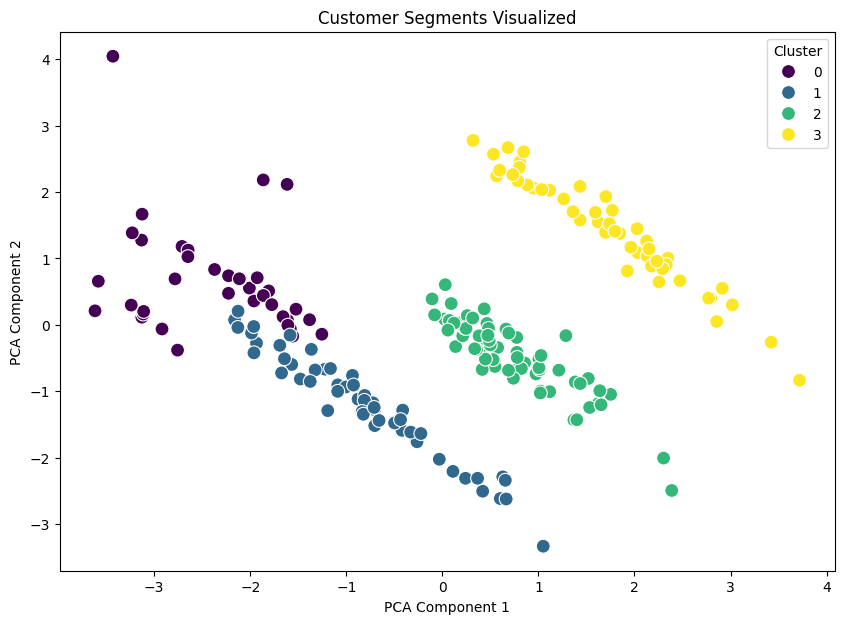

In [ ]:
# Drop CustomerID for clustering
X = customer_features.drop('CustomerID', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply K-Means with an arbitrary number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to customers
customer_features['Cluster'] = kmeans.labels_
print(customer_features.head())


# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segments Visualized")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [11]:
# Save CustomerID and Cluster to a CSV file
clustering_results = customer_features[['CustomerID', 'Cluster']]
clustering_results.to_csv('FirstName_LastName_Clustering.csv', index=False)

print("Clustering results saved to FirstName_LastName_Clustering.csv")
# Read the CSV back to verify
verified_data = pd.read_csv('FirstName_LastName_Clustering.csv')
print(verified_data.head())
from google.colab import files

# Download the CSV file
files.download('FirstName_LastName_Clustering.csv')


Clustering results saved to FirstName_LastName_Clustering.csv
  CustomerID  Cluster
0      C0001        1
1      C0002        2
2      C0003        1
3      C0004        0
4      C0005        2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>